In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import joblib

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

import missingno as msno
import matplotlib.ticker as mtick

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [38]:
df_train = pd.read_csv('../Data/df_train.csv', sep=',')
df_valid = pd.read_csv('../Data/df_valid.csv', sep=',')
df_test = pd.read_csv('../Data/df_test.csv', sep=',')

In [39]:
columns_with_missings = joblib.load('../artifacts/columns_with_missings.pkl')
df_numerical_variables = joblib.load('../artifacts/df_numerical_variables.pkl')
df_categorical_variables = joblib.load('../artifacts/df_categorical_variables.pkl')

In [40]:
df_numerical_variables = df_numerical_variables.drop(['Latitude', 'Longitude'])

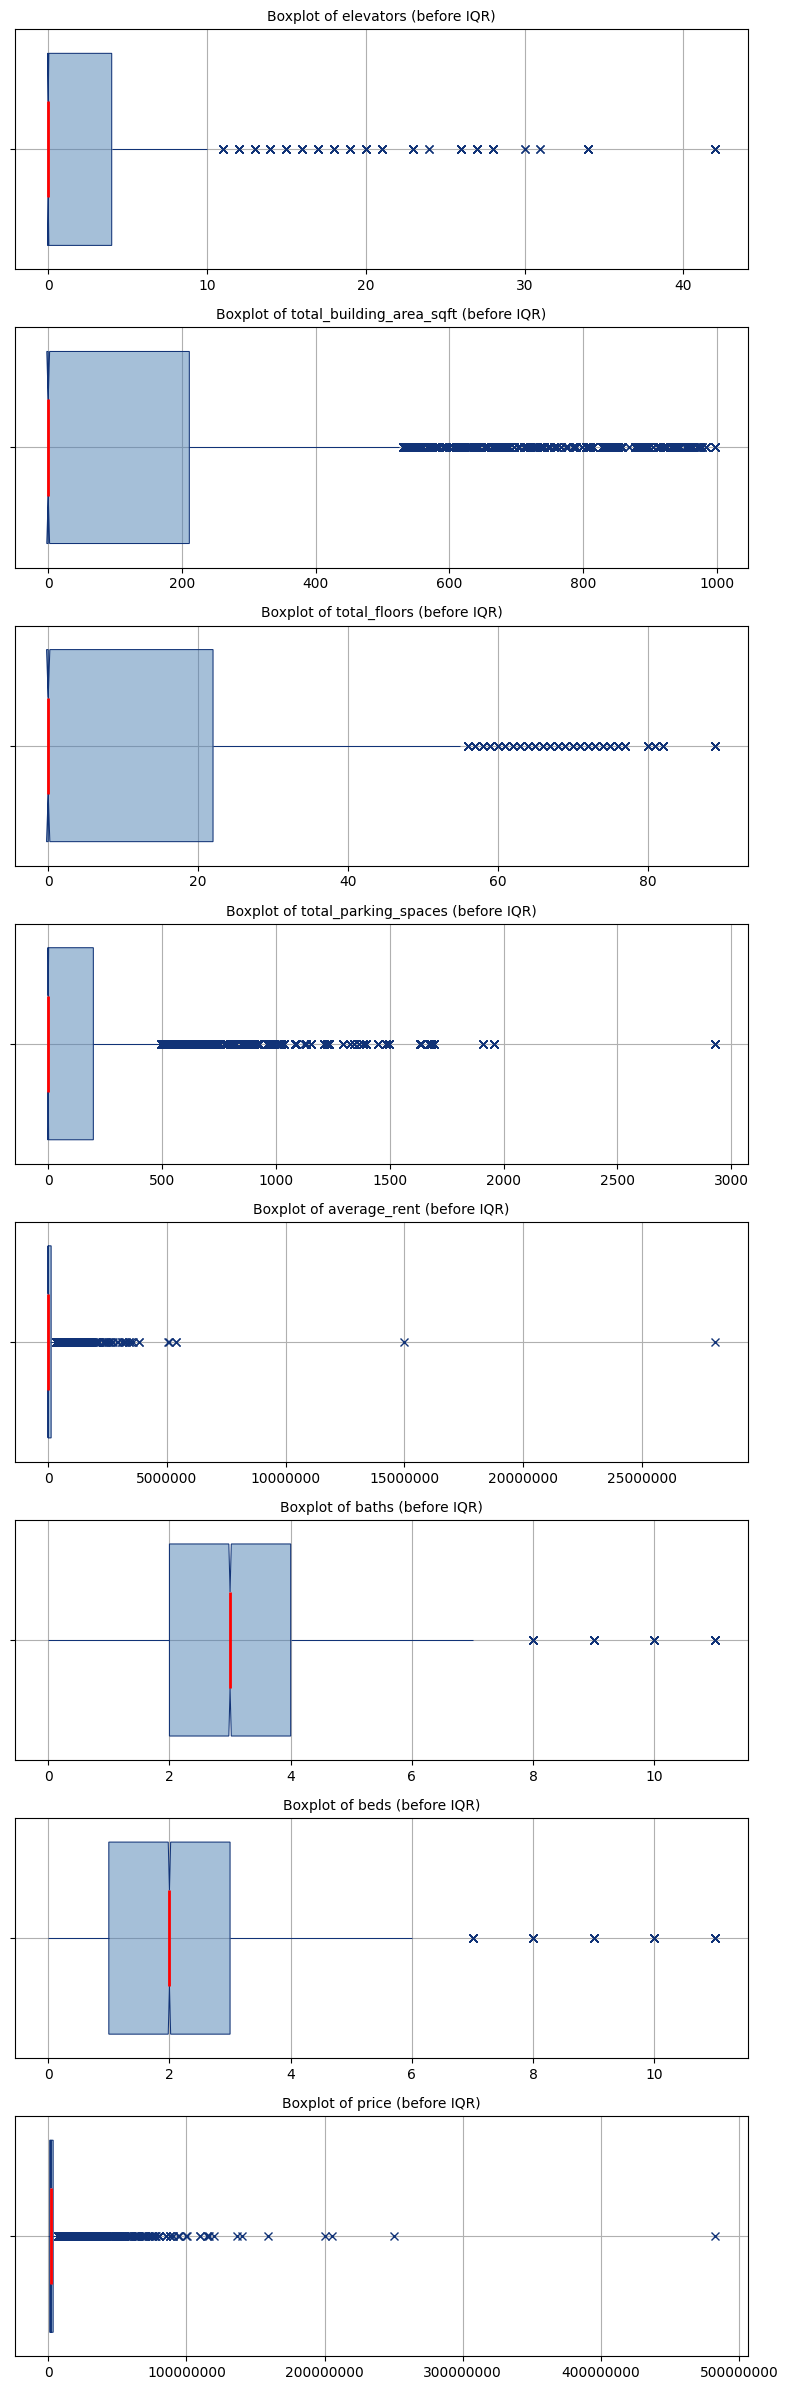

In [42]:
cols = [
    'elevators','total_building_area_sqft','total_floors','total_parking_spaces',
    'average_rent','baths','beds','price'
]

fig, axes = plt.subplots(len(cols), 1, figsize=(8, 3 * len(cols)))

for i, c in enumerate(cols):
    sns.boxplot(
        x=df_train[c],
        ax=axes[i],
        notch=True, showcaps=False,
        flierprops={"marker": "x"},
        boxprops={"facecolor": (.3, .5, .7, .5)},
        medianprops={"color": "r", "linewidth": 2},
        linecolor="#137",
        linewidth=.75
    )
    axes[i].set_title(f'Boxplot of {c} (before IQR)', fontsize=10)
    axes[i].set_xlabel("")
    axes[i].xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))
    axes[i].grid()

plt.tight_layout()
plt.show()


In [44]:
# 2. apply IQR to train/valid/test
def apply_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for c in cols:
    df_train = apply_iqr(df_train, c)
    # df_valid = apply_iqr(df_valid, c)
    # df_test  = apply_iqr(df_test,  c)

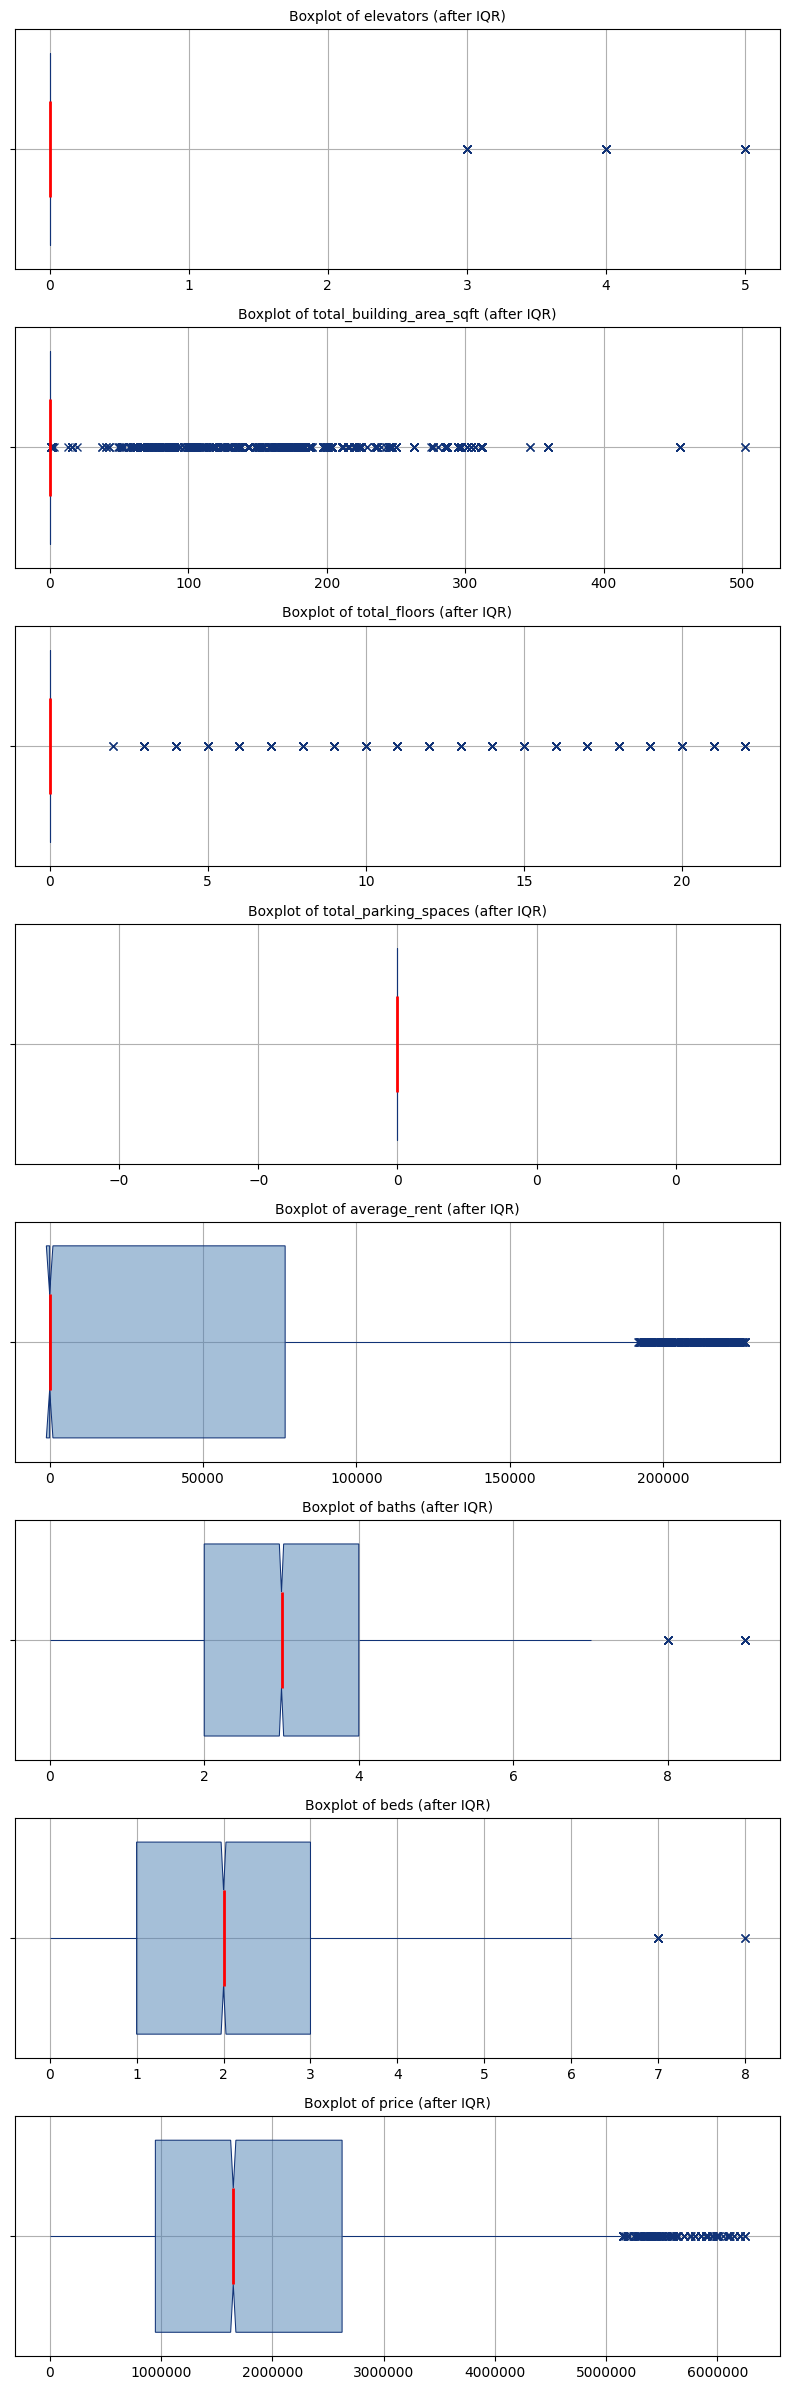

In [36]:
fig, axes = plt.subplots(len(cols), 1, figsize=(8, 3 * len(cols)))

for i, c in enumerate(cols):
    sns.boxplot(
        x=df_train[c],
        ax=axes[i],
        notch=True, showcaps=False,
        flierprops={"marker": "x"},
        boxprops={"facecolor": (.3, .5, .7, .5)},
        medianprops={"color": "r", "linewidth": 2},
        linecolor="#137",
        linewidth=.75
    )
    axes[i].set_title(f'Boxplot of {c} (after IQR)', fontsize=10)
    axes[i].set_xlabel("")
    axes[i].xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))
    axes[i].grid()

plt.tight_layout()
plt.show()


In [46]:
#save df to CSV file
df_train.to_csv('../Data/cleaned/df_train.csv', index=False)
df_valid.to_csv('../Data/cleaned/df_valid.csv', index=False)
df_test.to_csv('../Data/cleaned/df_test.csv', index=False)